In [1]:
import numpy 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [12]:
#data = pd.read_csv("datasets/ds_texto.csv")
#data = pd.read_csv("datasets/ds_full.csv")
#data = pd.read_csv("datasets2/ds_texto.csv")
#data = pd.read_csv("datasets2/ds_full.csv")
#data = pd.read_csv("datasets2/ds_full_em.csv")
#data = pd.read_csv("datasets/ds_texto_concat.csv")
data = pd.read_csv("datasets2/ds_texto_concat.csv")

data.head()

,id,rotulo,MAIUSCULAS,EXCLAMA,ASPAS,POL_ABSOLUTO,funct,pronoun,ppron,i,...,negate,verb,adj,interrog,affect,posemo,negemo,anx,anger,sad
0,53,FALSO,0.185105,0.0,0.0,0.500000,0.488384,0.419191,0.230473,0.237002,...,0.104996,0.324418,0.373536,0.104918,0.348045,0.078747,0.441619,0.245902,0.000000,0.0
1,1136,VERDADE,0.097101,0.0,0.0,0.333333,0.428923,0.321148,0.138170,0.000000,...,0.220311,0.534851,0.065315,0.660442,0.426006,0.082617,0.555985,0.000000,0.186732,0.0
2,695,FALSO,0.409534,0.0,0.0,0.500000,0.493180,0.454024,0.145687,0.000000,...,0.000000,0.102536,0.275475,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
3,3312,VERDADE,0.122886,0.0,0.0,0.583333,0.356806,0.196390,0.104917,0.000000,...,0.000000,0.246138,0.264511,0.111443,0.246460,0.083644,0.281450,0.000000,0.000000,0.0
4,1314,VERDADE,0.000000,0.0,0.0,0.500000,0.522131,0.277393,0.115869,0.000000,...,0.000000,0.271833,0.146062,0.492308,0.068047,0.092376,0.000000,0.000000,0.000000,0.0


## Separando treino do teste

In [13]:
X = data.drop('id', axis=1)
X = X.drop('rotulo', axis=1)
y = data['rotulo']

In [14]:
# Diagnosis values are strings. Changing them into numerical values using LabelEncoder.
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)

## Separa o dataset para treino

In [15]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

### SMOTE dataset pq ele é desbalanceado
over = SMOTE(sampling_strategy=1, random_state= 109)
under = RandomUnderSampler(sampling_strategy=1, random_state= 109)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

print('Original dataset:', Counter(encoded_Y))

X, encoded_Y = pipeline.fit_resample(X, encoded_Y)

print('Resampled dataset:', Counter(encoded_Y))


X_train, X_test, y_train, y_test = train_test_split(X, encoded_Y, test_size=0.3, random_state=109) 

Original dataset: Counter({1: 613, 0: 379})
Resampled dataset: Counter({0: 613, 1: 613})


## Normaliza os valores

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)  


## Treina o modelo

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Input, AlphaDropout
from keras.callbacks import EarlyStopping
import numpy as np

input_dim = X_train.shape[1]

print(input_dim)

model = Sequential()

model.add(Dense(128, activation='relu', input_shape=(input_dim,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

es = EarlyStopping(monitor='accuracy', patience=20, restore_best_weights=True)                   
model.fit(X_train, y_train,epochs=100, batch_size=16, verbose=1, callbacks=[es])


28
Epoch 1/100
54/54 [==============================] - 1s 1ms/step - loss: 0.6950 - accuracy: 0.5766
Epoch 2/100
54/54 [==============================] - 0s 2ms/step - loss: 0.6454 - accuracy: 0.6407
Epoch 3/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5980 - accuracy: 0.7021
Epoch 4/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5346 - accuracy: 0.7702
Epoch 5/100
54/54 [==============================] - 0s 2ms/step - loss: 0.5098 - accuracy: 0.7812
Epoch 6/100
54/54 [==============================] - 0s 2ms/step - loss: 0.4505 - accuracy: 0.8167
Epoch 7/100
54/54 [==============================] - 0s 2ms/step - loss: 0.3948 - accuracy: 0.8349
Epoch 8/100
54/54 [==============================] - 0s 2ms/step - loss: 0.3441 - accuracy: 0.8725
Epoch 9/100
54/54 [==============================] - 0s 2ms/step - loss: 0.3162 - accuracy: 0.8861
Epoch 10/100
54/54 [==============================] - 0s 2ms/step - loss: 0.2535 - accuracy: 0.9216
Epoch 

## Avaliação e Métricas

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
#pega a predição
#y_pred = model.predict_classes(X_test)
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[139  47]
 [ 53 129]]
              precision    recall  f1-score   support

           0       0.72      0.75      0.74       186
           1       0.73      0.71      0.72       182

    accuracy                           0.73       368
   macro avg       0.73      0.73      0.73       368
weighted avg       0.73      0.73      0.73       368



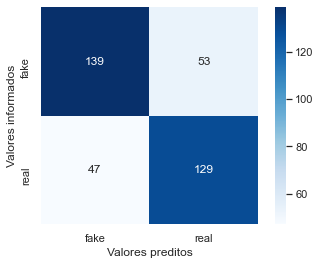

In [19]:
# use seaborn plotting defaults
import seaborn as sns; sns.set()

mat = confusion_matrix(y_test,y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap="Blues", cbar=True,
            xticklabels=['fake','real'],
            yticklabels=['fake','real'])
plt.xlabel('Valores preditos')
plt.ylabel('Valores informados');


In [20]:
score = model.evaluate(X_test, y_test,verbose=1)

12/12 [==============================] - 0s 6ms/step - loss: 1.4748 - accuracy: 0.7283


## Validação Cruzada

In [21]:
from sklearn.model_selection import StratifiedKFold, KFold, cross_val_score 
from sklearn.metrics import roc_curve
from sklearn.metrics import auc, f1_score

# dfcv = pd.read_csv("datasets/ds_full_pt.csv")
# X = dfcv.drop('id', axis=1)
# X = X.drop('rotulo', axis=1)
# Y = dfcv['rotulo']

# fix random seed for reproducibility
seed = 109
numpy.random.seed(seed)

scaler = StandardScaler().fit(X)

X = scaler.transform(X)

# encoder = LabelEncoder()
# encoder.fit(Y)
# encoded_Y = encoder.transform(Y)

#Y = encoded_Y.reshape(-1,1)
Y = encoded_Y



kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)

cvscores = []
cvaucs = []
f1s = []
    
for train, test in kfold.split(X, Y):   
    scores = model.evaluate(X[test], Y[test], verbose=0)
    #print("%s: %.4f%%" % (model.metrics_names[1], scores[1]))
    cvscores.append(scores[1])
    
    #Calculo do AUC
    #y_pred_keras = model.predict(X[test]).ravel()
    y_pred_keras = (model.predict(X[test]) > 0.5).astype("int32")
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(Y[test], y_pred_keras)
    auc_keras = auc(fpr_keras, tpr_keras)
    #print("auc_keras %.4f%%" % (auc_keras))
    cvaucs.append(auc_keras)
    
    #F1-score
    #f1_pred = model.predict_classes(X[test])
    f1_pred = (model.predict(X[test]) > 0.5).astype("int32")

    f1 = f1_score(Y[test], f1_pred, average="binary")
    f1s.append(f1)
    print("%s: %.4f - AUC %.2f - F1 %.4f " % (model.metrics_names[1], scores[1], auc_keras, f1 ))
    
print(">> Acurácia %.4f (+/- %.4f)" % (numpy.mean(cvscores), numpy.std(cvscores)))
print(">> AUC %.4f (+/- %.4f)" % (numpy.mean(cvaucs), numpy.std(cvaucs)))
print(">> F1 %.4f (+/- %.4f)" % (numpy.mean(f1s), numpy.std(f1s)))

accuracy: 0.8862 - AUC 0.89 - F1 0.8814 
accuracy: 0.9106 - AUC 0.91 - F1 0.9091 
accuracy: 0.9024 - AUC 0.90 - F1 0.9032 
accuracy: 0.9024 - AUC 0.90 - F1 0.9062 
accuracy: 0.9512 - AUC 0.95 - F1 0.9500 
accuracy: 0.9431 - AUC 0.94 - F1 0.9440 
accuracy: 0.9262 - AUC 0.93 - F1 0.9231 
accuracy: 0.9426 - AUC 0.94 - F1 0.9431 
accuracy: 0.8934 - AUC 0.89 - F1 0.8908 
accuracy: 0.9180 - AUC 0.92 - F1 0.9194 
>> Acurácia 0.9176 (+/- 0.0214)
>> AUC 0.9176 (+/- 0.0214)
>> F1 0.9170 (+/- 0.0221)


## Resultados Finais

In [12]:
#y_pred_total = model.predict_classes(X)
y_pred_total = (model.predict(X) > 0.5).astype("int32")

print(confusion_matrix(Y, y_pred_total))
print(classification_report(Y, y_pred_total))

[[186   5]
 [  5 186]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       191
           1       0.97      0.97      0.97       191

    accuracy                           0.97       382
   macro avg       0.97      0.97      0.97       382
weighted avg       0.97      0.97      0.97       382



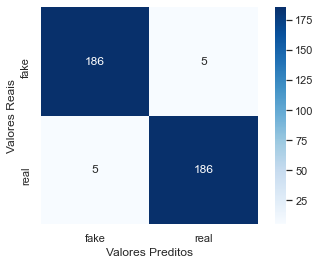

In [13]:
# use seaborn plotting defaults
import seaborn as sns

mat = confusion_matrix(Y, y_pred_total)
sns.heatmap(mat, square=True, annot=True, fmt='d', cmap="Blues", cbar=True,
            xticklabels=['fake','real'],
            yticklabels=['fake','real'])
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais');